# Capstone: General Exploratory Data Analysis

# AUTOMATED ANALYSIS SUMMARY

### Required Python Libraries and Functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import sys as sys
import time
from IPython.display import display
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [3]:
#if csv/if excel/if sql/ allow for reading different types of files
def read (filename, filetype):
    if filetype == '.csv':
        df = pd.read_csv(filename)
    elif filetype == '.xslx':
        df = pd.read_excel(filename)
    elif filetype == '.sql':
        #df = pd.read_sql(sql, con, index_col=None) ##get the right libraries
        print('Please use sql engine and connect to sql database')
    return df

In [4]:
def listfiles (directory, extension):
    # user can input any directory here as well
    # if the user wants another file added, just add it to this directory and rerun the code
    filenames = []
    for file in os.listdir():
        if file.endswith(extension):
            filenames.append(file)
        else:
            continue
    return filenames

In [5]:
#return 2 lists, Numerical columns and Categorical columns
def types(Dataframe):
    numerical = Dataframe.select_dtypes(exclude = ['object']).columns.tolist()
    categorical = Dataframe.select_dtypes(include = ['object']).columns.tolist()
    return numerical, categorical

In [6]:
def nullvalues(Dataframe, dfcolumns):
    #identify column index with nulls and remove them
    nullindices =[]
    for col in range(len(dfcolumns)):
        if (Dataframe[dfcolumns[col]].isna().sum()) == 0:
            print('Column : ',dfcolumns[col], 'has no null values')
            df = Dataframe
        else:
            nullindices.append(col)
            print('___________________')
            print('Column : ',dfcolumns[col], 'has null values\n')
            print('___________________')
            print('Potential Unique Values to Fill:\n', Dataframe[dfcolumns[col]].unique())
            value = input('Now, you should fill this column in a value of your choice: ')
            df = Dataframe.fillna(value, inplace = True)
    return nullindices, df

In [7]:
def duplicaterows(Dataframe):
    duplicaterows = Dataframe[Dataframe.duplicated()]
    if duplicaterows.empty:
        print('No duplicated rows found')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicaterows)##drop duplicates
        df = Dataframe.drop_duplicates(keep = 'last', inplace = True)
    return duplicaterows, df

In [8]:
def duplicatecols(Dataframe):
    duplicatecols = Dataframe.columns[Dataframe.columns.duplicated()]
    if duplicatecols.empty:
        print('There are no duplicated cols in this dataframe')
        df = Dataframe##don't drop duplicates
    else:
        print(duplicatecols)
        df = Dataframe.drop(columns = duplicatecols, inplace = True)##drop duplicates
    return duplicatecols, df

### STEP 1:LOADING DATA: LOAD AND READ DATASET

In [10]:
print('READING FILES FROM DIRECTORY EDA-airlines-project:\n')
# list directory
directory = 'EDA-airlines-project'
extension = ('.csv', '.xslx', '.sql')
filenames = listfiles(directory, extension)
readfiles = []
renames = []
for i in range(len(filenames)):
    print('File to be read:', filenames[i],'\n')
    index = os.path.splitext(filenames[i])  ##returns tuple
    file_name = index[0]
    renames.append(file_name)
    readfiles.append(file_name)
    print('File name:', file_name,'\n')
    file_ext = index[1]
    print('File extension:', file_ext,'\n')
    readfiles[i] = read(filenames[i], file_ext)
    
print('DONE...\n')

print('LOADING SAMPLES OF THE DATASET(S):\n')
dfcount = len(readfiles)
print('THE TOTAL NUMBER OF DATASETS IN THIS DIRECTORY IS: ', dfcount, '\n')
if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('SAMPLE OF THE FIRST DATASET:\n')
    display(readfiles[0].sample())
    print('___________________________________________________________________\n')
    print('SAMPLE OF THE LAST DATASET:\n')
    display(readfiles[dfcount - 1].sample())
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('SAMPLE OF THE DATASET:\n')
    display(readfiles[0].sample())
    print('___________________________________________________________________\n')
    
print('DONE...\n')

READING FILES FROM DIRECTORY EDA-airlines-project:

File to be read: International_Report_Departures.csv 

File name: International_Report_Departures 

File extension: .csv 

File to be read: International_Report_Passengers.csv 

File name: International_Report_Passengers 

File extension: .csv 

DONE...

LOADING SAMPLES OF THE DATASET(S):

THE TOTAL NUMBER OF DATASETS IN THIS DIRECTORY IS:  2 

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

SAMPLE OF THE FIRST DATASET:



,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
75108,01/01/2007,2007,1,10397,ATL,34,13166,MAO,316,20377,X9,1,Departures,0,3,3


___________________________________________________________________

SAMPLE OF THE LAST DATASET:



,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
141029,12/01/2007,2007,12,10721,BOS,13,16217,YUL,941,20398,MQ,1,Passengers,29,0,29


___________________________________________________________________

DONE...



### STEP 2:UNDERSTANDING DATA: DESCRIBE AND BRIEF THE DATASET

In [11]:
print('BRIEFING OF THE DATASETS:\n')
if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('BRIEF OF THE FIRST DATASET:\n')
    display(readfiles[0].info())
    print('___________________________________________________________________\n')
    print('BRIEF OF THE LAST DATASET:\n')
    display(readfiles[dfcount - 1].info())
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('BRIEF OF THE DATASET:\n')
    display(readfiles[0].info())
    print('___________________________________________________________________\n')

print('DONE...\n')
print('DESCRIBING THE DATASETS:\n')
if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('DESCRIBE THE FIRST DATASET:\n')
    display(readfiles[0].describe())
    print('___________________________________________________________________\n')
    print('DESCRIBE THE LAST DATASET:\n')
    display(readfiles[dfcount - 1].describe())
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('DESCRIBE THE DATASET:\n')
    display(readfiles[0].info())
    print('___________________________________________________________________\n')

print('DONE...\n')

BRIEFING OF THE DATASETS:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

BRIEF OF THE FIRST DATASET:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dty

None

___________________________________________________________________

BRIEF OF THE LAST DATASET:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680985 entries, 0 to 680984
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      680985 non-null  object
 1   Year          680985 non-null  int64 
 2   Month         680985 non-null  int64 
 3   usg_apt_id    680985 non-null  int64 
 4   usg_apt       680985 non-null  object
 5   usg_wac       680985 non-null  int64 
 6   fg_apt_id     680985 non-null  int64 
 7   fg_apt        680985 non-null  object
 8   fg_wac        680985 non-null  int64 
 9   airlineid     680985 non-null  int64 
 10  carrier       678188 non-null  object
 11  carriergroup  680985 non-null  int64 
 12  type          680985 non-null  object
 13  Scheduled     680985 non-null  int64 
 14  Charter       680985 non-null  int64 
 15  Total         680985 non-null  int64 
dtypes: int64(11),

None

___________________________________________________________________

DONE...

DESCRIBING THE DATASETS:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

DESCRIBE THE FIRST DATASET:



,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


___________________________________________________________________

DESCRIBE THE LAST DATASET:



,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000,680985.000000
mean,2006.141110,6.366576,12779.103825,44.394527,13493.331869,468.122264,20031.610461,0.562233,6478.893801,196.740288,6675.634089
std,8.716122,3.466745,2510.939346,28.110753,1955.917890,292.799407,510.270976,0.496112,8622.704655,954.759814,8532.400269
min,1990.000000,1.000000,10010.000000,1.000000,10125.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11760.000000,204.000000,19623.000000,0.000000,142.000000,0.000000,633.000000
50%,2007.000000,6.000000,12889.000000,33.000000,13408.000000,429.000000,19917.000000,1.000000,3561.000000,0.000000,3803.000000
75%,2014.000000,9.000000,13796.000000,74.000000,15092.000000,736.000000,20312.000000,1.000000,9700.000000,0.000000,9761.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,149898.000000,58284.000000,150195.000000


___________________________________________________________________

DONE...



### STEP 3:UNDERSTANDING DATA: IDENTIFY COLUMN TYPES IN DATASET

In [12]:
print('LISTING THE COLUMNS IN THE DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('COLUMNS OF THE FIRST DATASET:\n')
    df0columns = readfiles[0].columns
    display(df0columns)
    print('___________________________________________________________________\n')
    print('COLUMNS OF THE LAST DATASET:\n')
    df_1columns = readfiles[dfcount - 1].columns
    display(df_1columns)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('COLUMNS OF THE DATASET:\n')
    df0columns = readfiles[0].columns
    display(df0columns)
    print('___________________________________________________________________\n')

print('DONE...\n')

print('IDENTIFYING THE TYPES OF COLUMNS IN THE DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('COLUMN TYPES OF THE FIRST DATASET:\n')
    df0dtypes = readfiles[0].dtypes 
    display(df0dtypes)
    print('___________________________________________________________________\n')
    print('COLUMN TYPES OF THE LAST DATASET:\n')
    df_1dtypes = readfiles[dfcount - 1].dtypes
    display(df_1dtypes)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('COLUMN TYPES OF THE DATASET:\n')
    df0dtypes = readfiles[0].dtypes
    display(df0dtypes)
    print('___________________________________________________________________\n')

print('DONE...\n')

print('IDENTIFYING THE TYPES OF COLUMNS INTO EITHER NUMERICAL OR CATEGORICAL IN THE DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('NUMERICAL TYPE COLUMNS OF THE FIRST DATASET:\n')
    df0numerical, df0categorical = types(readfiles[0])
    display(df0numerical)
    print('CATEGORICAL TYPE COLUMNS OF THE FIRST DATASET:\n')
    display(df0categorical)
    print('___________________________________________________________________\n')
    print('NUMERICAL TYPE COLUMNS OF THE LAST DATASET:\n')
    df_1numerical, df_1categorical = types(readfiles[dfcount - 1])
    display(df_1numerical)
    print('CATEGORICAL TYPE COLUMNS OF THE LAST DATASET:\n')
    display(df_1categorical)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('NUMERICAL TYPE COLUMNS OF THE DATASET:\n')
    df0numerical, df0categorical = types(readfiles[0])
    display(df0numerical)
    print('CATEGORICAL TYPE COLUMNS OF THE DATASET:\n')
    display(df0categorical)
    print('___________________________________________________________________\n')

print('DONE...\n')

LISTING THE COLUMNS IN THE DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

COLUMNS OF THE FIRST DATASET:



Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

___________________________________________________________________

COLUMNS OF THE LAST DATASET:



Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total'],
      dtype='object')

___________________________________________________________________

DONE...

IDENTIFYING THE TYPES OF COLUMNS IN THE DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

COLUMN TYPES OF THE FIRST DATASET:



data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

___________________________________________________________________

COLUMN TYPES OF THE LAST DATASET:



data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

___________________________________________________________________

DONE...

IDENTIFYING THE TYPES OF COLUMNS INTO EITHER NUMERICAL OR CATEGORICAL IN THE DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

NUMERICAL TYPE COLUMNS OF THE FIRST DATASET:



['Year',
 'Month',
 'usg_apt_id',
 'usg_wac',
 'fg_apt_id',
 'fg_wac',
 'airlineid',
 'carriergroup',
 'Scheduled',
 'Charter',
 'Total']

CATEGORICAL TYPE COLUMNS OF THE FIRST DATASET:



['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']

___________________________________________________________________

NUMERICAL TYPE COLUMNS OF THE LAST DATASET:



['Year',
 'Month',
 'usg_apt_id',
 'usg_wac',
 'fg_apt_id',
 'fg_wac',
 'airlineid',
 'carriergroup',
 'Scheduled',
 'Charter',
 'Total']

CATEGORICAL TYPE COLUMNS OF THE LAST DATASET:



['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']

___________________________________________________________________

DONE...



### STEP 4:PREPARING DATA: HANDLE NULLS

In [13]:
print('IDENTIFY AND HANDLE NULL VALUES:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('NULL HANDLING OF THE FIRST DATASET:\n')
    nullindices0, df0 = nullvalues(readfiles[0], df0columns)
    display('NULL INDICES:', nullindices0)
    print('___________________________________________________________________\n')
    print('NULL HANDLING OF THE LAST DATASET:\n')
    nullindices_1, df_1 = nullvalues(readfiles[dfcount - 1], df_1columns)
    display('NULL INDICES:', nullindices_1)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('NULL HANDLING OF THE DATASET:\n')
    nullindices0, df0 = nullvalues(readfiles[0], df0columns)
    display('NULL INDICES:', nullindices0)
    print('___________________________________________________________________\n')

print('DONE...\n')
#nullindices0, df0renamed = nullvalues(readfiles[0], df0columns)

IDENTIFY AND HANDLE NULL VALUES:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

NULL HANDLING OF THE FIRST DATASET:

Column :  data_dte has no null values
Column :  Year has no null values
Column :  Month has no null values
Column :  usg_apt_id has no null values
Column :  usg_apt has no null values
Column :  usg_wac has no null values
Column :  fg_apt_id has no null values
Column :  fg_apt has no null values
Column :  fg_wac has no null values
Column :  airlineid has no null values
___________________
Column :  carrier has null values

___________________
Potential Unique Values to Fill:
 ['PFQ' '5Y' 'GL' 'AMQ' '5L' 'JN' 'MMQ' 'AC' 'U5' 'GFQ' 'AM' 'L2' 'TZ' 'WO'
 'EZ' nan 'VSA' 'T9' 'AUQ' '3M' 'KAQ' 'LH' '9S' 'GG' 'WAP' 'SLQ' 'XP' 'U7'
 'PCQ' '13Q' 'GR' 'PRQ' 'TRA' 'JL' 'ABX' 'FX' 'E9' 'EUQ' 'PN' 'RYQ' '6B'
 'PT' 'MG' 'RD' 'CC' 'POQ' 'CS' 'RNQ' 'A2' 'PLQ' 'DL' 'XG' 'KE' 'SVW'
 'VIQ' 'CCQ' 'NLQ' 'ZX' 'BNQ' 'BRQ' 'W8' 'AD' 'CYQ' 'X9' 'CEQ' '8C' 'MX'
 '0WQ' 'CAQ' 'TCQ' 'LGQ' 'G

'NULL INDICES:'

[10]

___________________________________________________________________

NULL HANDLING OF THE LAST DATASET:

Column :  data_dte has no null values
Column :  Year has no null values
Column :  Month has no null values
Column :  usg_apt_id has no null values
Column :  usg_apt has no null values
Column :  usg_wac has no null values
Column :  fg_apt_id has no null values
Column :  fg_apt has no null values
Column :  fg_wac has no null values
Column :  airlineid has no null values
___________________
Column :  carrier has null values

___________________
Potential Unique Values to Fill:
 ['AM' 'C6' 'RD' 'MG' 'TZ' 'SLQ' 'CO' '0BQ' 'RGQ' 'WO' '3M' 'T9' 'OW' 'FCQ'
 'SEQ' 'GL' 'AS' 'X9' 'PCQ' 'W8' '5X' 'ZX' 'RYQ' 'MMQ' 'DL' 'XP' 'NW' 'JL'
 'USQ' 'TZQ' '4N' 'G4' nan 'UA' 'PBQ' 'TBQ' 'U5' 'KAH' 'YX' 'LGQ' 'BY'
 'PPQ' 'MX' '04Q' 'AC' '0J' 'PLQ' 'SY' 'CAZ' 'F9' 'BNQ' 'SVW' '09Q' 'CS'
 'CC' 'RNQ' 'AA' 'PN' '4T' '8E' 'GBQ' 'B6' '0CQ' 'XG' '5L' 'BZQ' '14Q'
 'E9' 'DE' 'S4' '05Q' 'MT' '0JQ' 'KE' 'CAQ' '0UQ' 

'NULL INDICES:'

[10]

___________________________________________________________________

DONE...



### STEP 5:PREPARING DATA: DROP DUPLICATES

In [14]:
print('IDENTIFY AND DROP DUPLICATE VALUES:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('DUPLICATE HANDLING OF THE FIRST DATASET:\n')
    duplicaterows0, df0 = duplicaterows(df0)
    print('DUPLICATE ROWS:', duplicaterows0, '\n')
    duplicatecols0, df0 = duplicatecols(df0)
    print('DUPLICATE COLUMNS:', duplicatecols0, '\n')
    print('___________________________________________________________________\n')
    print('DUPLICATE HANDLING OF THE LAST DATASET:\n')
    duplicaterows_1, df_1 = duplicaterows(df_1)
    print('DUPLICATE ROWS:', duplicaterows_1, '\n')
    duplicatecols_1, df_1 = duplicatecols(df_1)
    print('DUPLICATE COLUMNS:', duplicatecols_1, '\n')
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('DUPLICATE HANDLING OF THE DATASET:\n')
    duplicaterows0, df0 = duplicaterows(df0)
    print('DUPLICATE ROWS:', duplicaterows0, '\n')
    duplicatecols0, df0 = duplicatecols(df0)
    print('DUPLICATE COLUMNS:', duplicatecols0, '\n')
    print('___________________________________________________________________\n')

print('DONE...\n')
#duplicaterows0, df0 = duplicaterows(df0)
#duplicatecols0, df0 = duplicatecols(df0)

IDENTIFY AND DROP DUPLICATE VALUES:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

DUPLICATE HANDLING OF THE FIRST DATASET:

No duplicated rows found
DUPLICATE ROWS: Empty DataFrame
Columns: [data_dte, Year, Month, usg_apt_id, usg_apt, usg_wac, fg_apt_id, fg_apt, fg_wac, airlineid, carrier, carriergroup, type, Scheduled, Charter, Total]
Index: [] 

There are no duplicated cols in this dataframe
DUPLICATE COLUMNS: Index([], dtype='object') 

___________________________________________________________________

DUPLICATE HANDLING OF THE LAST DATASET:

No duplicated rows found
DUPLICATE ROWS: Empty DataFrame
Columns: [data_dte, Year, Month, usg_apt_id, usg_apt, usg_wac, fg_apt_id, fg_apt, fg_wac, airlineid, carrier, carriergroup, type, Scheduled, Charter, Total]
Index: [] 

There are no duplicated cols in this dataframe
DUPLICATE COLUMNS: Index([], dtype='object') 

___________________________________________________________________

DONE...



### STEP 6:PLOTTING FEATURES: CORRELATION MAP

In [15]:
print('CALCULATE CORRELATION OF EACH DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('CORRELATION OF NUMERICAL COLUMNS OF THE FIRST DATASET:\n')
    df0corr = df0[df0numerical].dropna().corr()
    display(df0corr)
    print('___________________________________________________________________\n')
    print('CORRELATION OF NUMERICAL COLUMNS OF THE LAST DATASET:\n')
    df_1corr = df_1[df_1numerical].dropna().corr()
    display(df_1corr)
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('CORRELATION OF NUMERICAL COLUMNS OF THE DATASET:\n')
    df0corr = df0[df0numerical].dropna().corr()
    display(df0corr)
    print('___________________________________________________________________\n')

print('DONE...\n')

CALCULATE CORRELATION OF EACH DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

CORRELATION OF NUMERICAL COLUMNS OF THE FIRST DATASET:



,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
Year,1.000000,-0.021233,0.005048,0.065969,0.053412,0.045974,0.312519,0.022367,0.069213,-0.052756,0.062673
Month,-0.021233,1.000000,-0.000944,-0.001765,-0.000760,0.017482,-0.004098,-0.007390,0.013036,-0.007488,0.012140
usg_apt_id,0.005048,-0.000944,1.000000,0.069199,0.030126,-0.002550,0.050586,-0.008993,-0.022789,0.000585,-0.022939
usg_wac,0.065969,-0.001765,0.069199,1.000000,0.096134,-0.043867,-0.004251,-0.050752,0.041788,-0.024382,0.038864
fg_apt_id,0.053412,-0.000760,0.030126,0.096134,1.000000,0.505629,0.076175,-0.002074,0.082709,-0.027337,0.079792
fg_wac,0.045974,0.017482,-0.002550,-0.043867,0.505629,1.000000,-0.002809,-0.148620,0.109073,-0.039502,0.104752
airlineid,0.312519,-0.004098,0.050586,-0.004251,0.076175,-0.002809,1.000000,0.116642,-0.144813,0.081447,-0.135098
carriergroup,0.022367,-0.007390,-0.008993,-0.050752,-0.002074,-0.148620,0.116642,1.000000,-0.026875,0.040866,-0.021539
Scheduled,0.069213,0.013036,-0.022789,0.041788,0.082709,0.109073,-0.144813,-0.026875,1.000000,-0.141007,0.990733
Charter,-0.052756,-0.007488,0.000585,-0.024382,-0.027337,-0.039502,0.081447,0.040866,-0.141007,1.000000,-0.005234


___________________________________________________________________

CORRELATION OF NUMERICAL COLUMNS OF THE LAST DATASET:



,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
Year,1.000000,-0.016399,0.007141,0.052941,0.051617,0.036911,0.331199,0.035147,0.101612,-0.129603,0.088185
Month,-0.016399,1.000000,-0.000288,0.000012,-0.001978,0.021702,-0.006513,-0.014229,0.033731,-0.016936,0.032193
usg_apt_id,0.007141,-0.000288,1.000000,0.075745,0.035645,0.025577,0.048309,-0.038074,-0.021915,0.010481,-0.020974
usg_wac,0.052941,0.000012,0.075745,1.000000,0.089745,-0.031150,-0.016639,-0.036533,0.034814,-0.020994,0.032833
fg_apt_id,0.051617,-0.001978,0.035645,0.089745,1.000000,0.534591,0.085683,-0.028446,-0.086146,-0.051050,-0.092770
fg_wac,0.036911,0.021702,0.025577,-0.031150,0.534591,1.000000,0.012183,-0.193238,0.085149,-0.061695,0.079146
airlineid,0.331199,-0.006513,0.048309,-0.016639,0.085683,0.012183,1.000000,0.079921,-0.235533,0.045278,-0.232959
carriergroup,0.035147,-0.014229,-0.038074,-0.036533,-0.028446,-0.193238,0.079921,1.000000,-0.073252,-0.008559,-0.074985
Scheduled,0.101612,0.033731,-0.021915,0.034814,-0.086146,0.085149,-0.235533,-0.073252,1.000000,-0.149451,0.993860
Charter,-0.129603,-0.016936,0.010481,-0.020994,-0.051050,-0.061695,0.045278,-0.008559,-0.149451,1.000000,-0.039135


___________________________________________________________________

DONE...



PLOTTING THE CORRELATION OF EACH DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

PLOTTING CORRELATION OF THE FIRST AND LAST DATASETS:



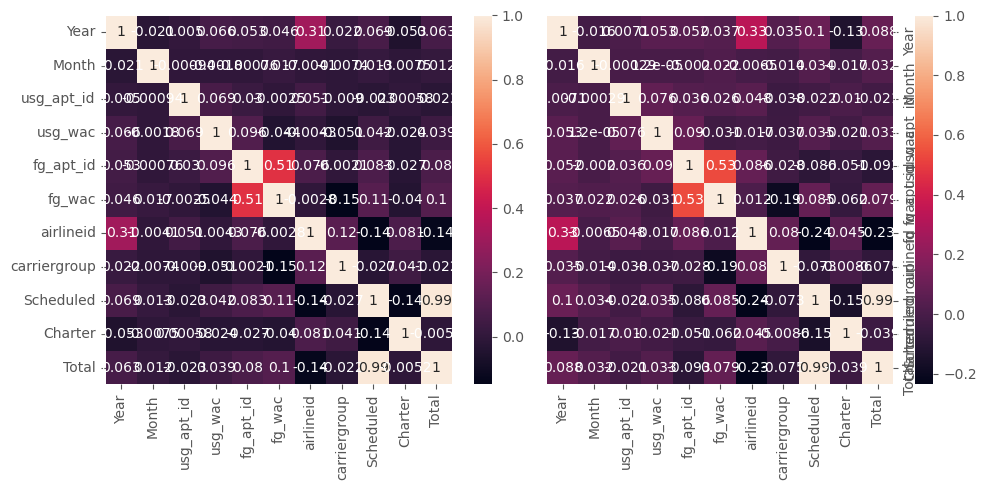

___________________________________________________________________

DONE...



In [16]:
print('PLOTTING THE CORRELATION OF EACH DATASET:\n')

if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('PLOTTING CORRELATION OF THE FIRST AND LAST DATASETS:\n')
    plt.rcParams["figure.figsize"] = [10, 5]
    plt.rcParams["figure.autolayout"] = True
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    fig.subplots_adjust(wspace=0.01)
    sns.heatmap(df0corr, ax=ax1, annot = True)
    sns.heatmap(df_1corr, ax=ax2, annot = True)
    ax2.yaxis.tick_right()
    fig.subplots_adjust(wspace=0.001)
    plt.show()
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('PLOTTING CORRELATION OF THE DATASET:\n')
    df0heatmap = sns.heatmap(df0corr, annot = True)
    display(df0heatmap)
    print('___________________________________________________________________\n')

print('DONE...\n')

### STEP 7:PLOTTING FEATURES: PAIRPLOT

In [17]:
print('PLOTTING THE PAIRPLOT OF EACH DATASET:\n')
flag = -1
if dfcount == 0:
    print('THERE ARE NO DATASETS, PLEASE TRY AGAIN LATER\n')
    flag = -1
elif dfcount > 1 :
    print('THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:\n')
    print('PLOTTING PAIRPLOTS OF THE FIRST AND LAST DATASETS:\n')
    flag = 1
    print('___________________________________________________________________\n')
else:
    print('THERE IS ONLY ONE DATASET READ IN THIS DIRECTORY:\n')
    print('PLOTTING PAIRPLOTS OF THE DATASET:\n')
    flag = 0
    df0pairplot = sns.pairplot(df0, vars = df0numerical)
    display(df0pairplot)
    print('___________________________________________________________________\n')

print('DONE...\n')

PLOTTING THE PAIRPLOT OF EACH DATASET:

THERE IS MORE THAN ONE DATASET READ IN THIS DIRECTORY:

PLOTTING PAIRPLOTS OF THE FIRST AND LAST DATASETS:

___________________________________________________________________

DONE...



In [ ]:
if flag == 1:
    sns.pairplot(df0, vars = df0numerical)
else:
    print('Wrong flag\n')
    
print('___________________________________________________________________\n')
print('DONE...\n')

In [ ]:
if flag == 1:
    sns.pairplot(df_1, vars = df_1numerical)
else:
    print('Wrong flag\n')
    
print('___________________________________________________________________\n')
print('DONE...\n')

# END OF AUTOMATED PROJECT 